<a href="https://colab.research.google.com/github/dhiru-c/Online-Retail-Customer-Segmentation---Capstone-Project/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

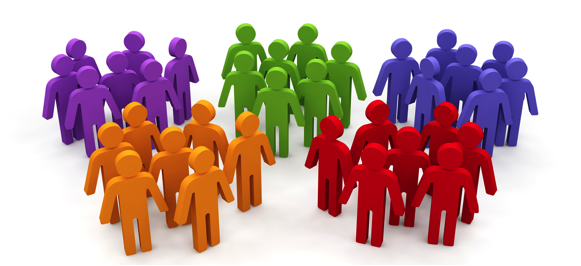

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Defining url of saved csv file
url = 'https://drive.google.com/uc?id=1_W3Jfp1bTWpPFmqyGgGXYJGd0rHIV8dD'


# Importing dataset to create a dataframe
df = pd.read_excel(url)

In [ ]:
# Checking shape of dataframe
df.shape

(541909, 8)

In [ ]:
# Checking top 5 records
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Checking bottom 5 records
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Basic Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Descriptive Statistics
df.describe(percentiles=[0.01,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,-2.00,1.00,3.00,10.00,100.0,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,0.19,1.25,2.08,4.13,18.0,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,12415.00,13953.00,15152.00,16791.00,18212.0,18287.0


In [ ]:
# Checking number of unique values in each column
for col in df.columns:
  print(col,':',df[col].nunique())

InvoiceNo : 25900
StockCode : 4070
Description : 4223
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4372
Country : 38


##**Feature Engineering**

In [ ]:
# Missing data counts and percentage
print('Missing Data Count')
print(df.isnull().sum())
print('--'*12)
print('Missing Data Percentage')
print((df.isnull().sum()/df.shape[0])*100)

Missing Data Count
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
------------------------
Missing Data Percentage
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


In [ ]:
# Dropping the rows with nulls
df.dropna(inplace=True)

In [ ]:
# Checking duplicates
print(len(df[df.duplicated()]))

5225


In [ ]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# New Shape
df.shape

(401604, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
# Creating new features from the datetime column InvoiceDate
df['year']        = df['InvoiceDate'].apply(lambda x : x.year)
df['month']       = df['InvoiceDate'].apply(lambda x : x.month)
df['month_name']  = df['InvoiceDate'].apply(lambda x : x.month_name())
df['day_name']    = df['InvoiceDate'].apply(lambda x : x.day_name())
df['hour']        = df['InvoiceDate'].apply(lambda x : x.hour)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,month_name,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,Wednesday,8


In [ ]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
df['TotalAmount'] = df['Quantity']*df['UnitPrice']

In [ ]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening
df['TimeType'] = np.where((df['hour']>5) & (df['hour']<18), np.where(
                          df['hour']<12,'Morning','Afternoon'),'Evening')

In [ ]:
# Checking the number of cancellations by each customer. InvoiceNo starting with 'C' represents cancellation
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
cancellations = df[df['InvoiceNo'].str.contains('C')].groupby('CustomerID')['InvoiceNo'].count().reset_index()

In [ ]:
# Renaming the columns and checking top 5 cancellations
cancellations.columns = ['CustomerID','cancellations']
cancellations.sort_values(by='cancellations',ascending=False).head(5)

,CustomerID,cancellations
736,14911.0,226
1485,17841.0,136
1397,17511.0,113
848,15311.0,112
89,12607.0,101


In [ ]:
# Dropping cancellations from the main dataframe
df=df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
df.shape

(392732, 15)

## **Exploratory Data Analysis**

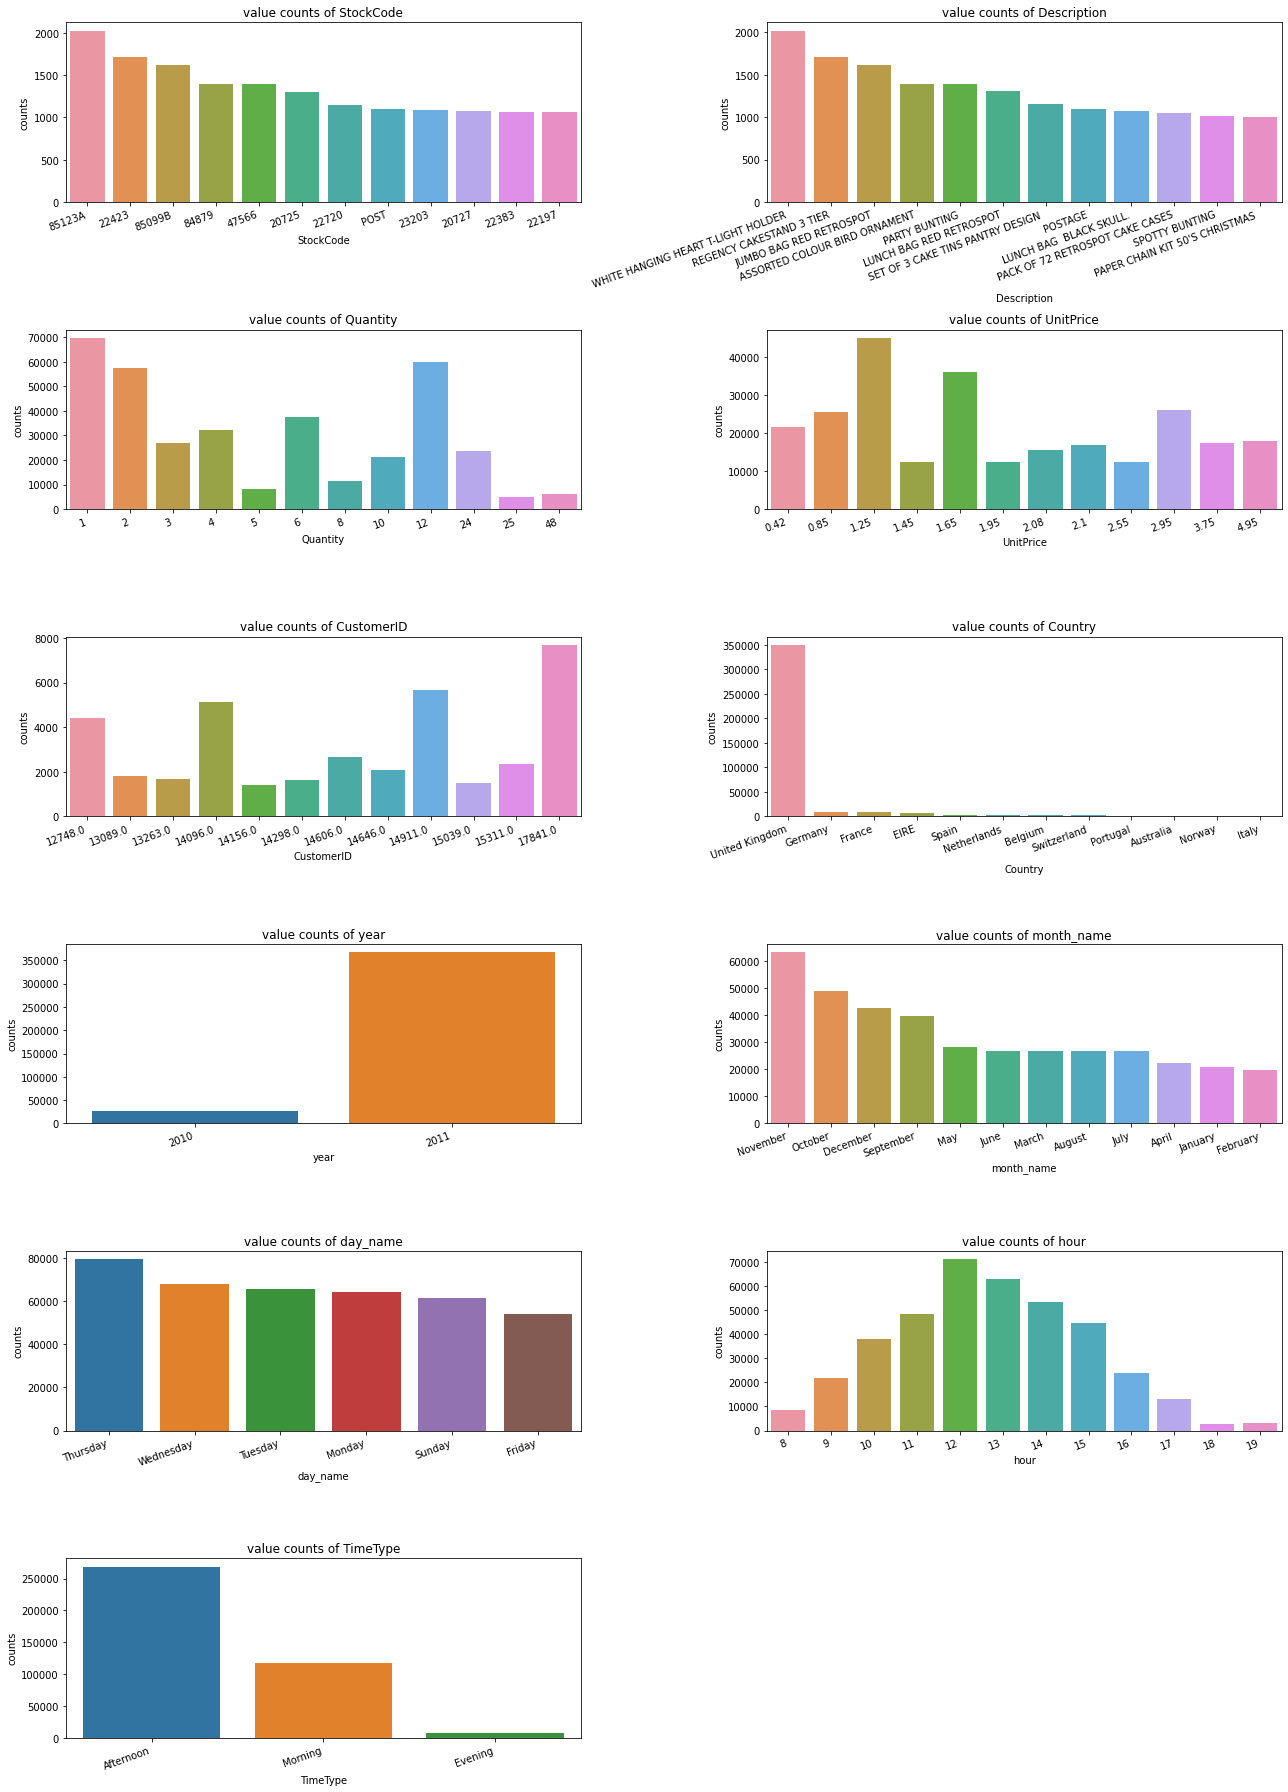

In [ ]:
# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','Quantity','UnitPrice', 'CustomerID', 'Country',
          'year', 'month_name','day_name','hour','TimeType']
plt.figure(figsize=(18,25))
for n,col in enumerate(target):
  plt.subplot(6,2,n+1)
  temp = df[col].value_counts().sort_values(ascending=False).head(12).reset_index()
  temp.rename(columns={'index' : col,col:'counts'},inplace=True)
  sns.barplot(x=col, y = 'counts' ,data=temp )
  plt.title(f'value counts of {col}')
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()
 

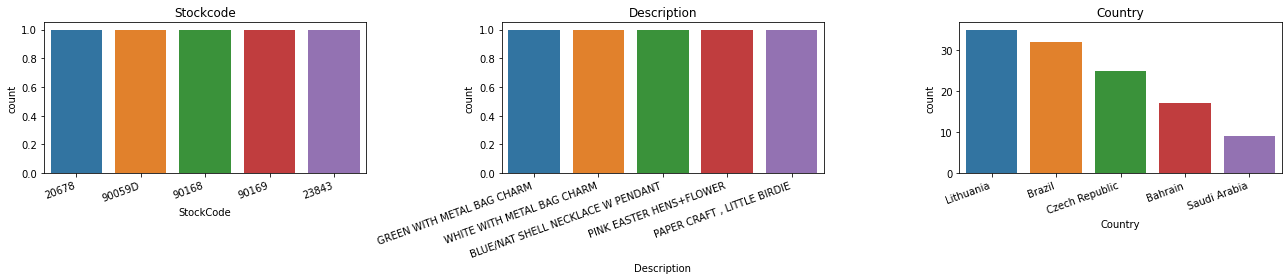

In [ ]:
# Plotting Bottom values based on frequency in each column
target = ['StockCode', 'Description','Country']

plt.figure(figsize=(18,4))
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = df[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

Observations/Hypothesis:
1. Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has lest number of customers 
2. There are no orders placed on Saturdays. Looks like its a non working day for the retailer.
3. Most numbers of customers have purched the gifts in the month of November ,October and December September
less numbers of customers have purches the gifts in the month of April ,january and February.
4. Most of the customers have purched the items in Aftrnoon ,moderate numbers of customers have purched the items in Morning and the least in Evening.
5. WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products

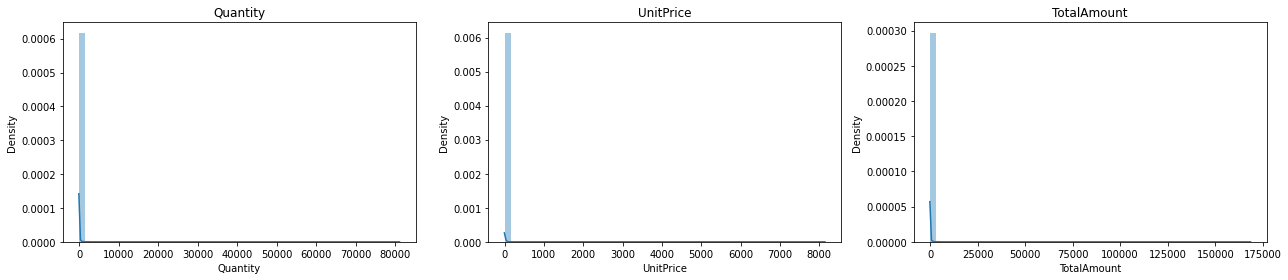

In [ ]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(18,4))
for n,col in enumerate(target):
  plt.subplot(1,3,n+1)
  sns.distplot(df[col])
  plt.title(col)
  plt.tight_layout()

1. In Positively skewed distribution, mean>median>mode and most of the values are clustered around the left tail of the distribution while the right tail of the distribution is longer.
2. In Negatively skewed distribution, mean<median<mode and most of the values are concentrated in the right side of the distribution graph while the left tail of the distribution graph is longer.
3. For symmetric graph mean=median=mode

Text(0.5, 1.0, 'log distribution of Quantity')

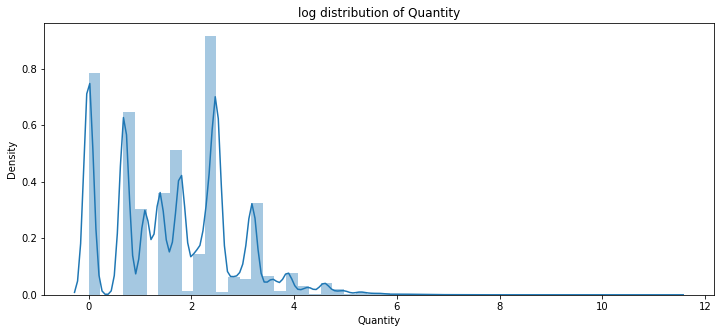

In [ ]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(12,5))
sns.distplot(np.log(df['Quantity']))
plt.title('log distribution of Quantity')

## **RFM Segmentation**

In [ ]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Createing a new dataframe to calculate Recency, Frequency and Monetry scores for each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate':lambda x : (LatestDate-x.max()).days,'InvoiceNo': lambda x: len(x),'TotalAmount':lambda x: x.sum() })

# Renaming the columns
rfm.columns = ['Recency',	'Frequency' , 'Monetary']

In [ ]:
# Checking top 5 rows
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


Interpretation:
1. Recency: How recent a customer made a purchase.
2. Frequency: How often a customer makes a purchase.
3. Monetary: How much money a customer spends.

In [ ]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'] , q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)


In [ ]:
#making new column having rfm score and group
rfm['RFM_group'] = rfm[['R','F','M']].apply(lambda x: int(str(x['R'])+str(x['F'])+str(x['M'])),axis=1)
rfm['RFM_score'] = rfm[['R','F','M']].apply(lambda x: x['R']+x['F']+x['M'] ,axis=1)

In [ ]:
#adding segment column of type of customer [RFM in 4 segments based on quantiles]
rfm['segment'] = pd.qcut(rfm['RFM_group'],q=4,labels=[1,2,3,4]).astype(int)
rfm.head(3)

,Recency,Frequency,Monetary,R,F,M,RFM_group,RFM_score,segment
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,1
12347.0,2,182,4310.00,4,4,4,444,12,4
12348.0,75,31,1797.24,2,2,4,224,8,2


Interpretation:

If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is a Big spender.
If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is a little spender.
If the RFM of any customer is 144. His purchased a long time ago but buys frequently and spends more. And so on.
Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4339 non-null   int64  
 1   Frequency  4339 non-null   int64  
 2   Monetary   4339 non-null   float64
 3   R          4339 non-null   int64  
 4   F          4339 non-null   int64  
 5   M          4339 non-null   int64  
 6   RFM_group  4339 non-null   int64  
 7   RFM_score  4339 non-null   int64  
 8   segment    4339 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 339.0 KB


In [ ]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.0,92.518322,100.009747,1.0,18.000,51.00,142.000,374.00
Frequency,4339.0,90.512100,225.515328,1.0,17.000,41.00,98.000,7676.00
Monetary,4339.0,2048.215924,8984.248352,0.0,306.455,668.56,1660.315,280206.02
R,4339.0,2.514174,1.126392,1.0,2.000,3.00,4.000,4.00
F,4339.0,2.487670,1.122724,1.0,1.000,2.00,3.000,4.00
M,4339.0,2.499885,1.118266,1.0,1.500,2.00,3.500,4.00
RFM_group,4339.0,278.793962,118.825268,111.0,211.000,311.00,411.000,444.00
RFM_score,4339.0,7.501729,2.816451,3.0,5.000,7.00,10.000,12.00
segment,4339.0,2.428670,1.146554,1.0,1.000,2.00,3.000,4.00


In [ ]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(to_replace=0,value=1,inplace=True)

#log_transformation of  Recency	Frequency	 and Monetary
rfm['Recency_Log']   = rfm['Recency'].apply(np.log) 
rfm['Frequency_Log'] =rfm['Frequency'].apply(np.log) 
rfm['Monetary_Log'] = rfm['Monetary'].apply(np.log) 

rfm.head(3)

,Recency,Frequency,Monetary,R,F,M,RFM_group,RFM_score,segment,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,1,5.786897,0.000000,11.253942
12347.0,2,182,4310.00,4,4,4,444,12,4,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,2,2,4,224,8,2,4.317488,3.433987,7.494007


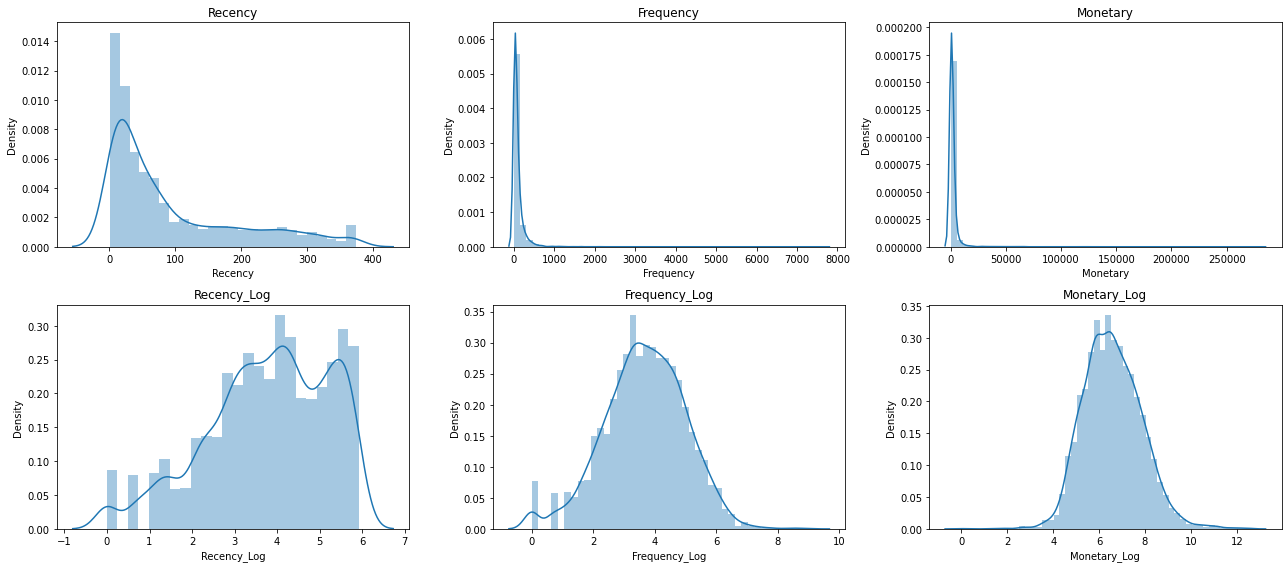

In [ ]:
#ploting graph before and after log transformation
target = ['Recency','Frequency', 'Monetary' ,'Recency_Log',	'Frequency_Log','Monetary_Log']

plt.figure(figsize=(18,8))
for n,cols in enumerate(target):
  plt.subplot(2,3,n+1)
  sns.distplot(rfm[cols])
  plt.title(cols)
  plt.tight_layout()

Observations:
1. Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.
2. It will be more suitable to use the transformed features for better visualisation of clusters.

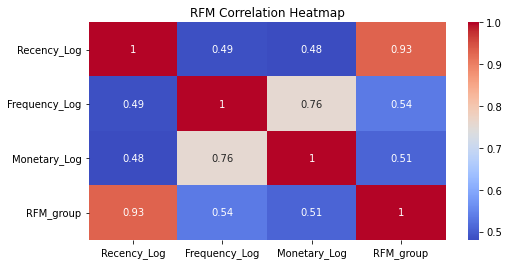

In [ ]:
# Visualizing the correlations among features.
target = ['Recency_Log','Frequency_Log','Monetary_Log','RFM_group']
plt.figure(figsize=(8,4))
sns.heatmap(abs(rfm[target].corr()),annot=True , cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

#**Clustering**

##**Prerequisites**

In [ ]:
# Defining X Variable
X = rfm[['Recency_Log','Frequency_Log','Monetary_Log']]
X = StandardScaler().fit_transform(X)

In [ ]:
# Defining a function for plotting clusters for Visualization
def plotc(y,title):
  '''Takes predicted y labels as input and plots 3d visualization of clusters'''
  plt.figure(figsize=(18,8))
  ax = plt.axes(projection='3d')
  ax.set_xlabel('Recency',   fontweight ='bold')
  ax.set_ylabel('Frequency', fontweight ='bold')
  ax.set_zlabel('Monetary',  fontweight ='bold')
  ax.set_title(title,        fontweight ='bold')
  ax = ax.scatter(X[:,0], X[:,1], X[:,2] ,c =y)
  plt.legend(*ax.legend_elements(), loc=1)
  plt.show()

##**Quantile Based Clustering**

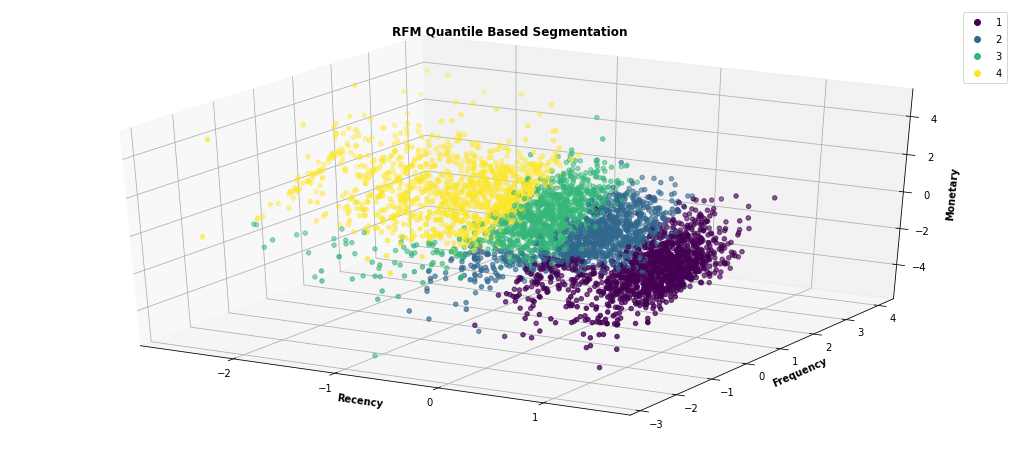

In [ ]:
# Splitting RFM in 4 segments based on quantiles to obtain segments
y_qcut = rfm['segment']

# Plotting Segments for Visualization
title = 'RFM Quantile Based Segmentation'
plotc(y_qcut,title)

##**K-Means Clustering**

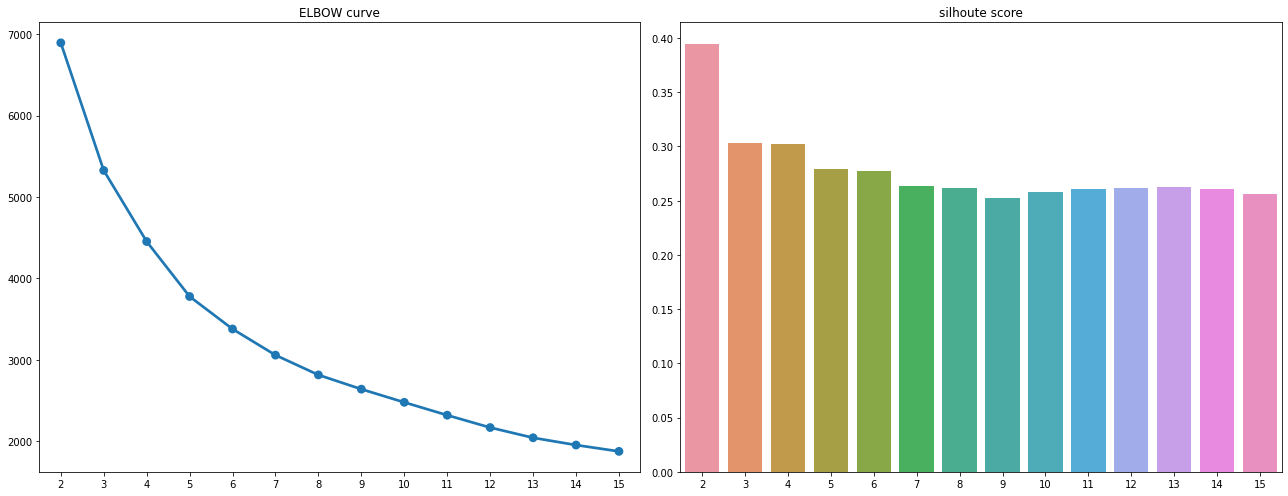

In [ ]:
#storing sum of square and siluote score for each k cluster

ssd,score = [],[]
k_cluster = list(range(2,16))
for k in k_cluster:
  clusterer = KMeans(n_clusters=k,  init="k-means++", max_iter=1000, random_state=0)
  y_pred = clusterer.fit_predict(X)
  ssd.append(clusterer.inertia_)
  score.append(silhouette_score(X, y_pred))


#ploting graph for elbow curve
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.pointplot(x = k_cluster, y = ssd)
plt.title('ELBOW curve')
plt.tight_layout()

#ploting graph for silhouette score
plt.subplot(1,2,2)
sns.barplot(x=k_cluster , y=score)
plt.title('silhoute score')
plt.tight_layout()

Observations:
1. From the Elbow curve 5 appears to be at the elbow and hence can be considered as the number of clusters. n_clusters=4 or 6 can also be considered based of the objective of segmentation.
2. We take maximum Silhouette Score as the criteria for selecting optimal number of clusters, then n_clusters=2 can be choosen.
3. If we look at both of the graphs at the same time to decide the optimal number of clusters, we can take the intersection of set of good n_clusters obtained from both the graphs. So 4 appears to be a good choice, having a decent Silhouette score as well as near the elbow of the elbow curve.

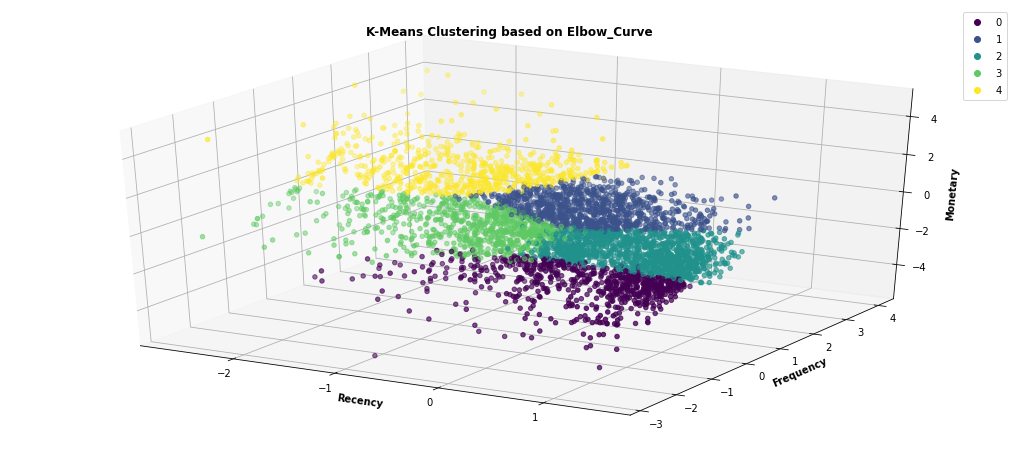

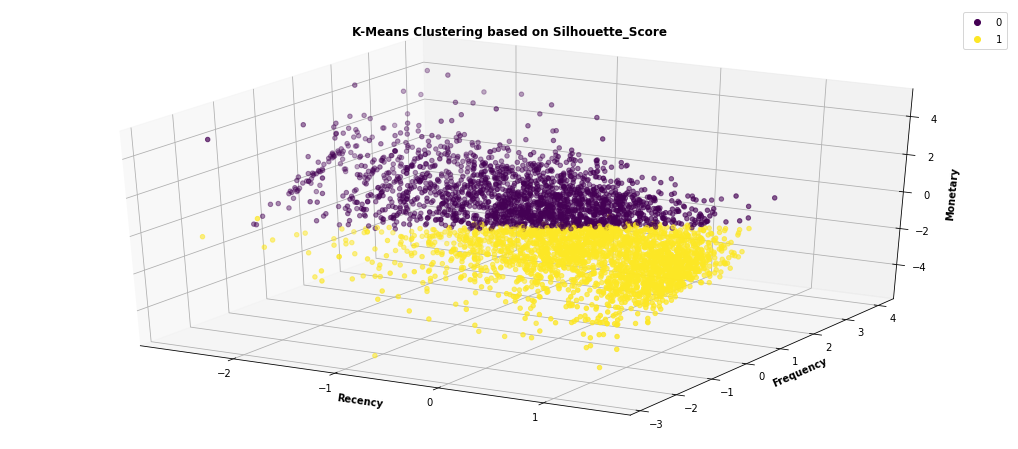

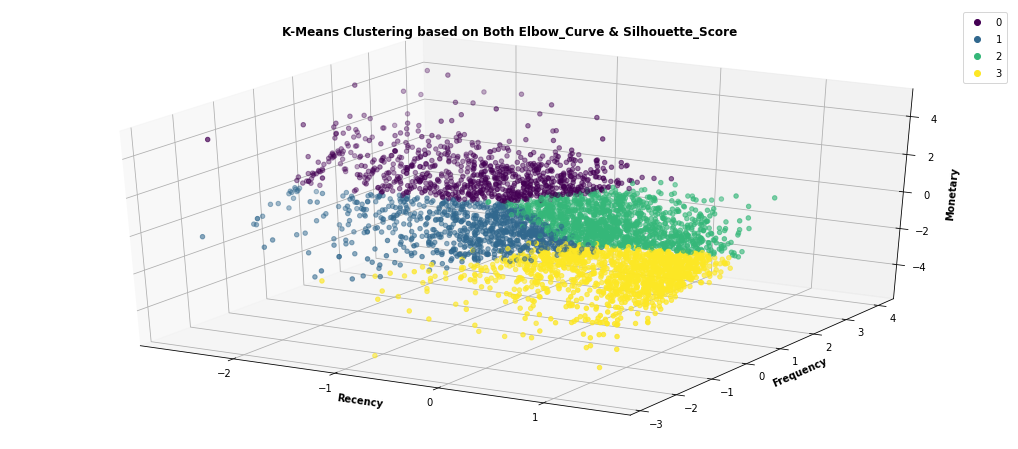

In [ ]:
# Iterating n_clusters = 5,2,4 based on above three conditions to visualise the segments.
for criteria,k in {'Elbow_Curve':5, 'Silhouette_Score':2,
                   'Both Elbow_Curve & Silhouette_Score':4}.items():

  # Fitting the model on n_clusters                
  kmc = KMeans(n_clusters=k)
  y_kmc = kmc.fit_predict(X)
  centers = kmc.cluster_centers_

  # Plotting Clusters for Visualization
  title = f'K-Means Clustering based on {criteria}'
  plotc(y_kmc,title)

##**Hierarchical Clustering**

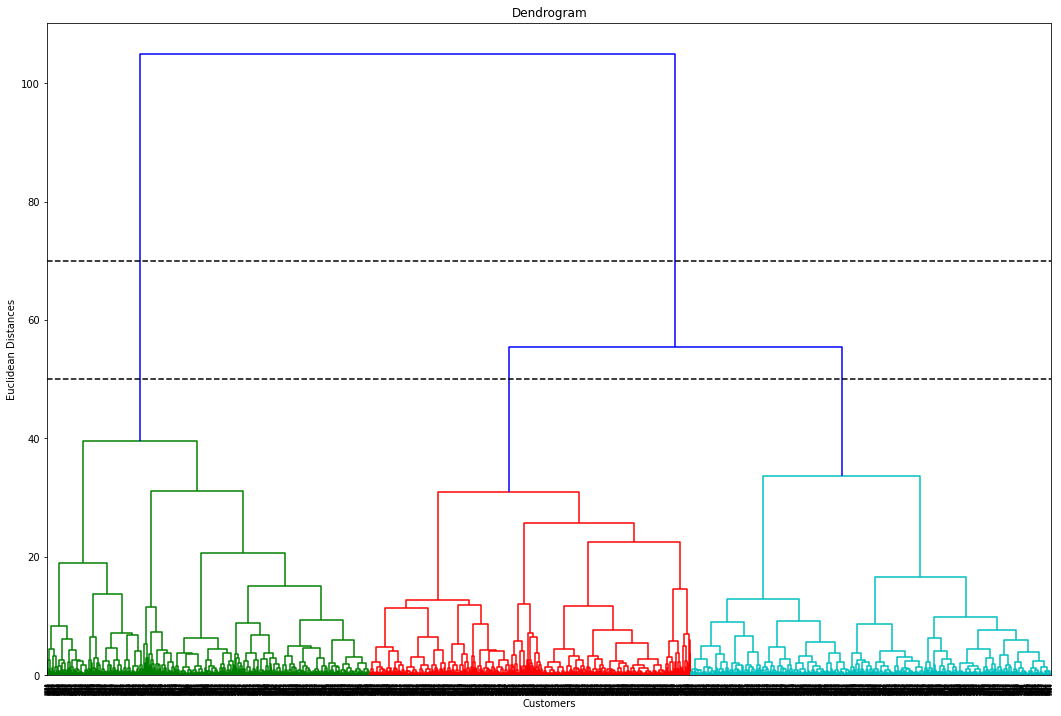

In [ ]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(18,12))
dendrogram(linkage(X, method='ward'), color_threshold=50)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=70, color='black', linestyle='--')
plt.axhline(y=50, color='black', linestyle='--')
plt.show()

Interpretation:
1. We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). We can set this threshold as 50 or 70 and draw a horizontal line as shown in dendogram above.
2. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. The larger threshold (y=70) results in 2 clusters while the smaller (y=50) results in 3 clusters.

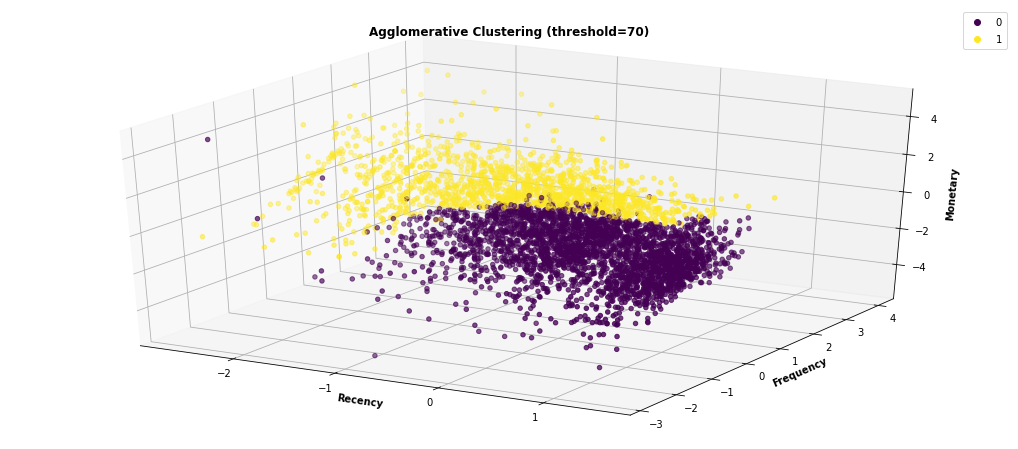

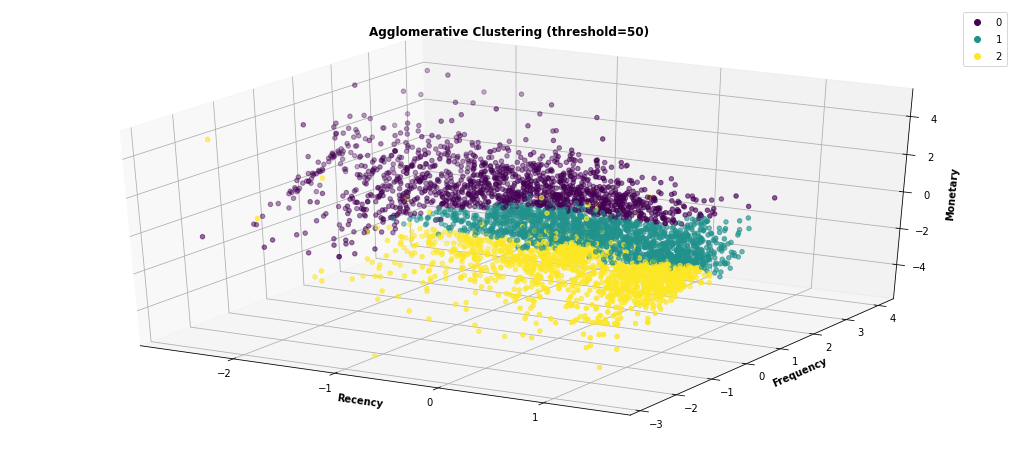

In [ ]:
# Lets visualize the clusters with n_clusters = 2 and 3
for threshold, k in {70:2, 50:3}.items():

  # Fitting hierarchical clustering with number of clusters based on dendogram
  ahc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
  y_ahc = ahc.fit_predict(X)

  # Plotting Clusters for Visualization
  title = f'Agglomerative Clustering (threshold={threshold})'
  plotc(y_ahc,title)

##**DBScan Clusterer**

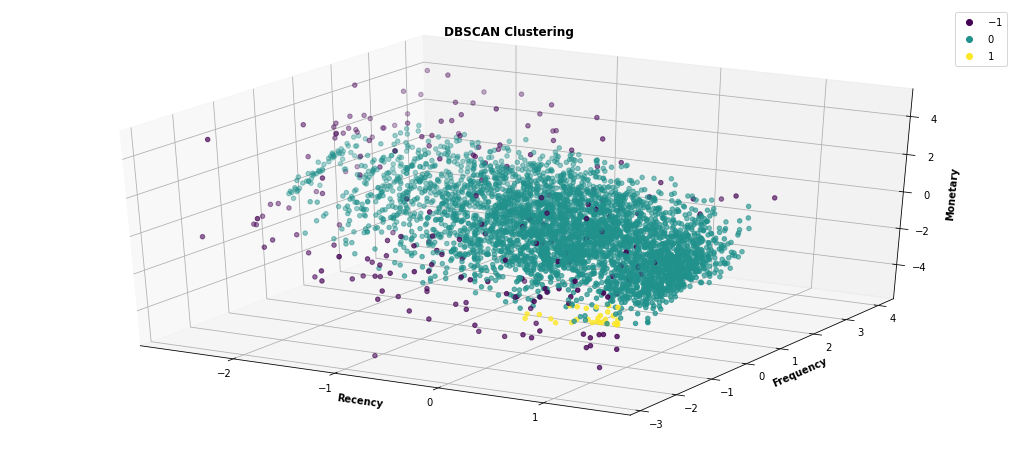

In [ ]:
# Fitting DBSCAN clusterer
dbsc = DBSCAN(eps=0.5, min_samples=15)
y_dbsc = dbsc.fit_predict(X)

# Plotting Clusters for Visualization
title = 'DBSCAN Clustering'
plotc(y_dbsc,title)

1. Density-based spatial clustering of applications with noise (DBSCAN) is an alternative to KMeans and hierarchical clustering. It does not require us to specify the number of clusters, as the clusters are formed by a process of linking neighbor points together.
2. It avoids outliers and identifies nested clusters within the data. The data is muddled and does not have major visible nested cluster, yet it has identified 3 clusters as shown above based on the hyperparameters defined.

In [ ]:
# Summarizing the results obtained by clustering using various methods
summary = pd.DataFrame({"Clusterer": ['Quantile Cut', "K-Means", "K-Means", "K-Means", "Agglomerative","Agglomerative", "DBSCAN"],
                        'Criterion': ['Quantile', 'Elbow Curve', 'Silhouette Score','Elbow Curve & Silhouette Score',
                                      'Dendogram (y=70)', 'Dendogram (y=50)', np.nan],
                        "Segments" : [4,5,2,4,2,3,3]})
summary

,Clusterer,Criterion,Segments
0,Quantile Cut,Quantile,4
1,K-Means,Elbow Curve,5
2,K-Means,Silhouette Score,2
3,K-Means,Elbow Curve & Silhouette Score,4
4,Agglomerative,Dendogram (y=70),2
5,Agglomerative,Dendogram (y=50),3
6,DBSCAN,NaN,3


1. We started with a quantile based simple segmentation model first then moved to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.
2. Then we moved to k-means clustering and visualized the results with different number of clusters. As we know there is no assurance that k-means will lead to the global best solution. We moved forward and tried Hierarchical Clustering and DBSCAN clusterer as well.
3.I didn’t obtain or be able to choose the final optimal cluster since I applied the models on same dataset i.e., RFM, but if we apply the model on the combination two features from RFM dataset then we are able to get the exact optimal cluster to divide our customer.
4. Keeping these points in view we clustered the major segments based on our understanding as per diffrent criteria as shown above in the summary dataframe